#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**





**Implementacja rozwiązań problemu plecakowego**

In [1]:
import itertools
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    items_num = len(self.weights)
    best_combination = None
    best_profit = 0
    best_weight = 0

    for combination in itertools.product([1,0], repeat=items_num):
      weight = sum(combination[item] * self.weights[item] for item in range(items_num))
      profit = sum(combination[item] * self.profits[item] for item in range(items_num))

      if weight <= self.capacity and profit > best_profit:
        best_combination = combination
        best_profit = profit
        best_weight = weight

    return list(best_combination), best_profit, best_weight

  def solve_knapsack_pw_ratio(self):
    items_num = len(self.weights)
    pw_ratio = [(item, self.profits[item] / self.weights[item]) for item in range(items_num)]
    pw_ratio.sort(reverse=True, key=lambda item: item[1])

    best_combination = [0] * items_num
    best_weight = 0
    best_profit = 0
    for item, _ in pw_ratio:
      if best_weight + self.weights[item] <= self.capacity:
        best_weight += self.weights[item]
        best_profit += self.profits[item]
        best_combination[item] = 1

    return best_combination, best_profit, best_weight

Rozwiązanie przykładu podanego w zadaniu

In [2]:
import numpy as np
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])
knapsack = KnapSack(profits, weights, capacity)

print("Wynik metody bruteforce: ", end='')
print(knapsack.solve_knapsack_brute_force())
print("Wynik metody wykorzystującej stosunek wartości do wagi: ", end='')
print(knapsack.solve_knapsack_pw_ratio())

Wynik metody bruteforce: ([0, 1, 1, 0], 17, 8)
Wynik metody wykorzystującej stosunek wartości do wagi: ([0, 1, 0, 1], 14, 5)


Wynik jest inny, ponieważ metoda heurystyczna nie zawsze zwraca optymalne rozwiązanie

**Klasa Timer do mierzenia czasu wykonania**

In [3]:
import gc
import time
class Timer:
  def __init__(self):
    self.start_time = 0
    self.stop_time = 0
    self.gc_old = None

  def start(self):
    gc_old = gc.isenabled()
    gc.disable()
    self.start_time = time.process_time()

  def stop(self):
    self.stop_time = time.process_time()
    if self.gc_old:
      gc.enable()

  def time(self):
    return self.stop_time - self.start_time

**Mierzenie czasu rozwiązania metodą bruteforce** \
Wykonuję pomiar czasu dla ilości przedmiotów od 2 do 20

In [4]:
import random
MAX_ITEMS = 20  #max 100
weights = random.sample(range(1, 100), MAX_ITEMS)
profits = random.sample(range(1, 100), MAX_ITEMS)

timer = Timer()
solution_time = []

for i in range(2, MAX_ITEMS + 1):
  knapsack = KnapSack(profits[:i], weights[:i], sum(weights[:i]) / 2)
  timer.start()
  knapsack.solve_knapsack_brute_force()
  timer.stop()
  solution_time.append((i, timer.time()))

**Wykres czasu rozwiązania metodą bruteforce w zależności od ilości przedmiotów**

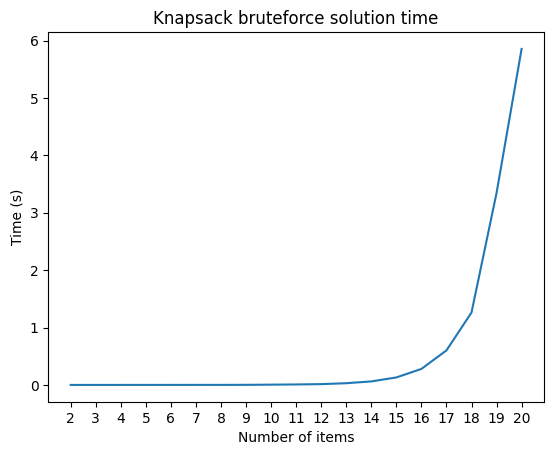

In [5]:
from matplotlib import pyplot as plt

plt.ylabel("Time (s)")
plt.xlabel("Number of items")
plt.title("Knapsack bruteforce solution time")
items, time = zip(*solution_time)
plt.plot(items, time)
plt.xticks(items)
plt.show()

Metoda bruteforce da zawsze optymalne rozwiązanie, ponieważ sprawdza, wszystkie możliwe kombinacje. Metoda heurystyczna, pakująca przedmioty według stosunku wartości do wagi, da rozwiązanie szybciej, ale nie zawsze będzie ono optymalne. Możliwe jest, że przedmiot z większym stosunkem wartości do wagi zajmie tyle miejsca, że kolejne, które dały by większy zysk, już sie nie zmieszczą. Na przykład jeśli mamy 10 jednostek miejsca, przemiot o wadze 7 i zysku 7 (stosunek 1) zajmie miejsce dwóm przedmiotom o wadze 5 i zysku 4 ( w sumie było by 8 zysku, ale stosunek tych przedmiotów to 0.8, więc zostały odrzucone). Metoda heurystyczna jest dużo szybsza, ale nie zawsze da optymalne rozwiązanie.